In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.rename(columns={'class': 'Label', 'oldName2': 'newName2'}, inplace=True)
list(df.columns)

['Unnamed: 0',
 'count',
 'hate_speech',
 'offensive_language',
 'neither',
 'Label',
 'tweet']

In [4]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,Label
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


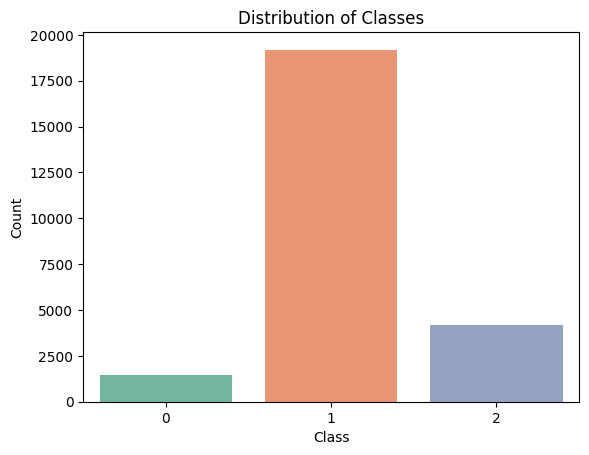

In [5]:
# create a countplot
sns.countplot(x='Label', data=df, palette='Set2')

# set the plot labels
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# show the plot
plt.show()

This shows the dataset is highly imbalanced


In [6]:
df=df.drop(['Unnamed: 0', 'count','hate_speech','offensive_language','neither'], axis = 1)

In [7]:
# replacing the label column value 2 with 1 as 2 is offensive speech 
# df['Label'] = df['Label'].replace(2, 1)

In [8]:
df.isnull().sum()

Label    0
tweet    0
dtype: int64

In [9]:
df.duplicated().sum()
# checking for duplicate columns

0

In [10]:
df.shape

(24783, 2)

In [11]:
# checking total number of hate speech and normal speech
df['Label'].value_counts()
# creating a df of random sampe 12k
df = df.sample(12000)

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# counting the number of characters in tweet
df['Char_count'] = df['tweet'].apply(len)


In [14]:
# counting the number of  words
df['word_count']=df['tweet'].apply(lambda x: len(nltk.word_tokenize(x)))

In [15]:
# counting sentence in tweet
df['Sentence_count']=df['tweet'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df[['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,12000.000000,12000.000000,12000.000000
mean,85.967417,20.067917,1.396083
std,41.300991,11.741570,0.729666
min,5.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,82.000000,18.000000,1.000000
75%,119.000000,27.000000,2.000000
max,754.000000,321.000000,8.000000


In [17]:
# analyzing non hate speech tweets
df[df['Label'] == 0][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,733.000000,733.000000,733.000000
mean,83.326057,18.373806,1.451569
std,40.043233,9.703499,0.764237
min,9.000000,2.000000,1.000000
25%,47.000000,10.000000,1.000000
50%,81.000000,18.000000,1.000000
75%,120.000000,25.000000,2.000000
max,185.000000,57.000000,5.000000


In [18]:
# analyzing hate speech tweets
df[df['Label'] == 1][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,9259.000000,9259.000000,9259.000000
mean,84.018253,19.960579,1.354358
std,41.371941,12.186003,0.694417
min,5.000000,1.000000,1.000000
25%,51.000000,11.000000,1.000000
50%,78.000000,18.000000,1.000000
75%,115.000000,27.000000,2.000000
max,754.000000,321.000000,8.000000


In [19]:
# analyzing ofensive speech tweets
df[df['Label'] == 2][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,2008.000000,2008.000000,2008.000000
mean,95.919323,21.181275,1.568227
std,39.982052,10.126554,0.840745
min,8.000000,1.000000,1.000000
25%,62.000000,13.000000,1.000000
50%,98.000000,21.000000,1.000000
75%,133.000000,28.000000,2.000000
max,257.000000,83.000000,6.000000


In [20]:
# making a preprocessor function for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

def preprocess_text(text):
    # remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    
    # lowercase all characters
    text = text.lower()
    
    # remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text_tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    text = ' '.join(filtered_text)
    
    # perform stemming
    porter = PorterStemmer()
    text_tokens = nltk.word_tokenize(text)
    stemmed_text = [porter.stem(word) for word in text_tokens]
    text = ' '.join(stemmed_text)
    
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['tweet'] = df['tweet'].apply(preprocess_text)
df['tweet'].head

<bound method NDFrame.head of 17457    rt stopbeingsob yall say date lil girl like ma...
21051              peopl bitch ass nigga amp stay far away
16898    rt pimp tigerwood ricki shitstach amp rest pus...
6245                           jennahnorberg retard lol jk
2547     barackobama marchforinnov send damn beaner bac...
                               ...                        
14098    rt mitchelll longdong uni suuuuck lolol suck b...
9359                     gm bird get worm today gostampsgo
12661    look like yanke compet boston east cellar year...
8156                                     boy yung thug fag
4710             sisson noah bird ground still aliv believ
Name: tweet, Length: 12000, dtype: object>

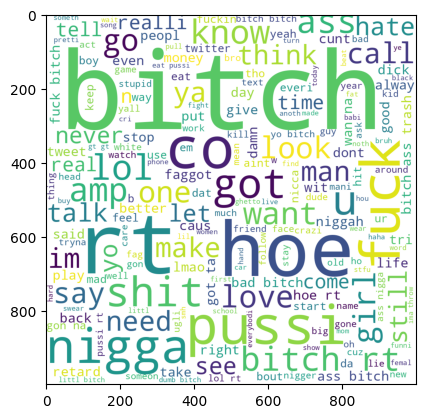

In [22]:
from wordcloud import WordCloud
wc =  WordCloud(width = 1000, height =1000, min_font_size = 10, background_color = 'white')
hate_wc = wc.generate(df[df['Label']==1]['tweet'].str.cat(sep=' '))
plt.imshow(hate_wc)

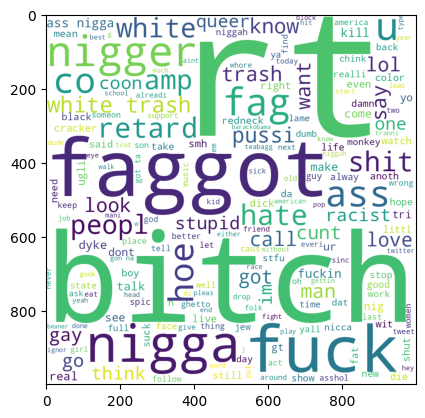

In [23]:
no_hate_wc = wc.generate(df[df['Label']==0]['tweet'].str.cat(sep=' '))
plt.imshow(no_hate_wc)

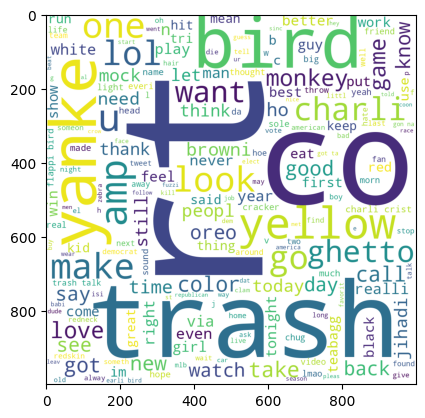

In [24]:

offensive_wc = wc.generate(df[df['Label']==2]['tweet'].str.cat(sep=' '))
plt.imshow(offensive_wc)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(df['tweet']).toarray()
print(X.shape)
y=df['Label'].values
print(y.shape)

(12000, 18957)
(12000,)


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [27]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [28]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='macro'))

0.5570833333333334
[[  40   73   28]
 [ 399 1086  392]
 [  29  142  211]]
0.418200816201379


In [29]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average='macro'))

0.8691666666666666
[[  11  116   14]
 [  17 1826   34]
 [   1  132  249]]
0.6993728280264375


In [30]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average='macro'))

0.835
[[   0  133    8]
 [   0 1864   13]
 [   0  242  140]]
0.567359910933323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Applying LR
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred4 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4, average='macro'))
     

0.965
[[ 105   42    7]
 [   8 1838   13]
 [   0   14  373]]
0.9495819669090005


In [35]:
# checking with Decision Tree
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
DTC_pred =DTC.predict(X_test)
print(accuracy_score(y_test,DTC_pred))
print(precision_score(y_test,DTC_pred, average='macro'))

0.8816666666666667
0.714330969414669


In [36]:
# Checking with KNN
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
knn_pred =knn.predict(X_test)
print(accuracy_score(y_test,knn_pred))
print(precision_score(y_test,knn_pred, average='macro'))

0.81875
0.6717685824327274


In [37]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfc= RandomForestClassifier(n_estimators= 18, criterion="entropy")
rfc.fit(X_train,y_train)
rfc_pred =rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred, average='macro'))

0.8779166666666667
0.7501081159580759


In [ ]:
# using xgboost
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_jobs=-1)
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

In [39]:
# AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)


In [42]:
# Print results
print(f"LogisticRegression Accuracy: { accuracy_score(y_test, y_pred4):.2f} | LogisticRegression Preciosion: {precision_score(y_test, y_pred4, average='macro'):.2f}")
print(f"Decission tree Accuracy: { accuracy_score(y_test,DTC_pred):.2f} | Decision Tree Preciosion: {precision_score(y_test,DTC_pred, average='macro'):.2f}")
print(f"KNN Accuracy:  { accuracy_score(y_test,knn_pred):.2f} | KNN Preciosion: {precision_score(y_test,knn_pred, average='macro'):.2f} ")
print(f"RandomForest:  { accuracy_score(y_test,rfc_pred):.2f} | Random Forest Preciosion: {precision_score(y_test,rfc_pred, average='macro'):.2f} ")
#print(f"XGBoost Accuracy: { accuracy_score(y_test,xgb_clf_pred):.2f} | XGBoost Preciosion: {precision_score(y_test,xgb_clf_pred, average='macro'):.2f} ")
print(f"AdaBoost Accuracy: { accuracy_score(y_test, y_pred_ada):.2f} | XGBoost Preciosion:  {precision_score(y_test,y_pred_ada, average='macro'):.2f} ")

LogisticRegression Accuracy: 0.96 | LogisticRegression Preciosion: 0.95
Decission tree Accuracy: 0.88 | Decision Tree Preciosion: 0.71
KNN Accuracy:  0.82 | KNN Preciosion: 0.67 
RandomForest:  0.88 | Random Forest Preciosion: 0.75 
AdaBoost Accuracy: 0.89 | XGBoost Preciosion:  0.71 
